# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [ ]:
# TODO: RA & Name 
print('RA:181980 ' + 'Bruno Martinez de Farias')
print('RA:220129 ' + 'Leonardo Mazzamboni Colussi')

## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




In [87]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import warnings
import zipfile
import os 
from datetime import datetime, date
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , RobustScaler, MaxAbsScaler, LabelEncode
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('SARESP_train.csv')
df.shape, df.duplicated().sum()

((120596, 88), 17424)

In [4]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103172 entries, 0 to 120594
Data columns (total 88 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             103172 non-null  int64  
 1   NOMESC               103172 non-null  object 
 2   Q1                   103172 non-null  object 
 3   Q2                   103172 non-null  object 
 4   Q3                   103172 non-null  object 
 5   Q4                   103172 non-null  object 
 6   Q5                   103172 non-null  object 
 7   Q6                   103172 non-null  object 
 8   Q7                   103172 non-null  object 
 9   Q8                   103172 non-null  object 
 10  Q9                   103172 non-null  object 
 11  Q10                  103172 non-null  object 
 12  Q11                  103172 non-null  object 
 13  Q12                  103172 non-null  object 
 14  Q13                  103172 non-null  object 
 15  Q14              

In [5]:
headers = ['SG_UF', 'CO_ENTIDADE', 'CO_MUNICIPIO', 'QT_MAT_BAS']

with zipfile.ZipFile('microdados_censo_escolar_2021.zip') as zip_reader:
    with zip_reader.open('2021/dados/microdados_ed_basica_2021.csv') as myZip:
        df_mec = pd.read_csv(myZip,
                             encoding = 'latin-1', 
                             sep = ';',
                             usecols = headers) 
        
df_mec_sp = df_mec[df_mec['SG_UF'] == 'SP'].dropna().reset_index(drop = True)

display(df_mec.head(), df_mec_sp.head())

,SG_UF,CO_MUNICIPIO,CO_ENTIDADE,QT_MAT_BAS
0,RO,1100015,11022558,8.0
1,RO,1100015,11024275,231.0
2,RO,1100015,11024291,10.0
3,RO,1100015,11024372,104.0
4,RO,1100015,11024666,173.0


,SG_UF,CO_MUNICIPIO,CO_ENTIDADE,QT_MAT_BAS
0,SP,3500105,35030806,699.0
1,SP,3500105,35031045,557.0
2,SP,3500105,35031082,952.0
3,SP,3500105,35031100,239.0
4,SP,3500105,35031112,656.0


In [6]:
df_mec_sp = df_mec_sp \
    .groupby('CO_MUNICIPIO')['QT_MAT_BAS'] \
    .agg(MAT_PER_MUN = 'sum', ESC_PER_MUN = 'count') \
    .reset_index() 

df_mec_sp.head()

,CO_MUNICIPIO,MAT_PER_MUN,ESC_PER_MUN
0,3500105,7248.0,26
1,3500204,839.0,5
2,3500303,7287.0,26
3,3500402,1092.0,8
4,3500501,3429.0,19


In [7]:
df_mec = pd.merge(df_mec, 
                  df_mec_sp, 
                  how = 'left', 
                  on = 'CO_MUNICIPIO')

df_mec = df_mec[df_mec['SG_UF'] == 'SP'].drop('SG_UF', axis = 1)

df_mec.rename(columns = {'CO_ENTIDADE': 'CODESC'}, inplace = True)
df_mec['CODESC'] = df_mec['CODESC'].apply(lambda x: str(x)[2:]).astype(int)

In [8]:
df = pd.merge(df, df_mec, how = 'left', on = 'CODESC').drop('CO_MUNICIPIO', axis = 1)
df.shape, df.duplicated().sum()

((103172, 91), 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103172 entries, 0 to 103171
Data columns (total 91 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             103172 non-null  int64  
 1   NOMESC               103172 non-null  object 
 2   Q1                   103172 non-null  object 
 3   Q2                   103172 non-null  object 
 4   Q3                   103172 non-null  object 
 5   Q4                   103172 non-null  object 
 6   Q5                   103172 non-null  object 
 7   Q6                   103172 non-null  object 
 8   Q7                   103172 non-null  object 
 9   Q8                   103172 non-null  object 
 10  Q9                   103172 non-null  object 
 11  Q10                  103172 non-null  object 
 12  Q11                  103172 non-null  object 
 13  Q12                  103172 non-null  object 
 14  Q13                  103172 non-null  object 
 15  Q14              

In [10]:
df['NEC_ESP_1'].unique(), df['NEC_ESP_2'].unique(), df['NEC_ESP_3'].unique(), df['NEC_ESP_4'].unique()

(array([nan, 'INTELCTUAL', 'TRANSTORNO DESINTEGRATIVO DA INFANCIA',
        'FISICA-PARALISIA CEREBRAL', 'SURDEZ SEVERA OU PROFUNDA',
        'FISICA-OUTROS', 'MULTIPLA', 'SURDEZ LEVE OU MODERADA',
        'SINDROME DE DOWN', 'AUTISTA INFANTIL', 'SINDROME DE ASPERGER',
        'FISICA-CADEIRANTE', 'BAIXA VISAO', 'SINDROME DE RETT',
        'ALTAS HABILIDADES/SUPERDOTACAO'], dtype=object),
 array([nan, 'BAIXA VISAO', 'FISICA-OUTROS',
        'TRANSTORNO DESINTEGRATIVO DA INFANCIA',
        'FISICA-PARALISIA CEREBRAL', 'FISICA-CADEIRANTE',
        'SURDEZ LEVE OU MODERADA', 'AUTISTA INFANTIL',
        'SURDEZ SEVERA OU PROFUNDA', 'SINDROME DE ASPERGER'], dtype=object),
 array([nan, 'FISICA-CADEIRANTE', 'INTELCTUAL', 'FISICA-OUTROS',
        'SURDEZ LEVE OU MODERADA', 'FISICA-PARALISIA CEREBRAL'],
       dtype=object),
 array([nan, 'INTELCTUAL'], dtype=object))

In [11]:
cond_deficientes = ((df['NEC_ESP_1'].isna() == False) & (df['NEC_ESP_1'] != 'ALTAS HABILIDADES/SUPERDOTACAO')) | (df['NEC_ESP_2'].isna() == False) | (df['NEC_ESP_3'].isna() == False) | (df['NEC_ESP_4'].isna() == False)
cond_superdotados = df['NEC_ESP_1'] == 'ALTAS HABILIDADES/SUPERDOTACAO'

idx_deficientes = df[cond_deficientes].index
idx_superdotados = df[cond_superdotados].index

In [12]:
df[['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp']].mean()

porc_ACERT_MAT    52.685468
porc_ACERT_CIE    56.960714
porc_ACERT_lp     60.465446
dtype: float64

In [13]:
df[cond_deficientes][['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp']].mean()

porc_ACERT_MAT    35.190641
porc_ACERT_CIE    42.150064
porc_ACERT_lp     40.841859
dtype: float64

In [14]:
df[cond_superdotados][['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp']].mean()

porc_ACERT_MAT    68.629412
porc_ACERT_CIE    73.770588
porc_ACERT_lp     75.982353
dtype: float64

In [15]:
# A: has any disability
# B: is gifted
# C: has no disability

df['disability'] = ['C' if i in idx_deficientes else 'B' if i in idx_superdotados else 'A' for i in df.index]

In [16]:
def age(birth_dt):
    today = date.today()
    return today.year - birth_dt.year - ((today.month, today.day) < (birth_dt.month, birth_dt.day))

In [17]:
df['Age'] = pd.to_datetime(df['DT_NASCIMENTO']).apply(lambda x: age(x))
df[['CODMUN', 'CODESC']] = df[['CODMUN', 'CODESC']].astype('str')

In [18]:
drop_cols_categ = ['NOMESC', 'MUN', 'DT_NASCIMENTO', 'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3', 'NEC_ESP_4', 
                   'TURMA', 'nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie']

drop_cols_numeric = ['CD_ALUNO', 'NEC_ESP_5','Tem_Nec']

df_categ = df.select_dtypes(include = 'object').drop(drop_cols_categ, axis = 1)
df_num = df.select_dtypes(include = 'number').drop(drop_cols_numeric, axis = 1)

df_categ.shape, df_num.shape

((103172, 72), (103172, 7))

In [19]:
df_categ.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,RegiaoMetropolitana,DE,CODMUN,CODESC,SERIE_ANO,TP_SEXO,PERIODO,Tipo_PROVA,disability
count,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172,103172
unique,4,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,3,3,3,3,3,2,4,2,4,4,3,3,3,3,3,4,4,2,3,3,3,3,3,3,3,5,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,3,3,4,4,4,4,7,65,351,2756,3,2,3,2,3
top,B,E,E,E,E,E,E,E,A,A,A,A,B,A,A,B,A,B,A,A,A,A,A,A,A,C,C,B,C,B,C,B,B,B,C,C,C,C,C,C,C,B,C,C,C,C,C,C,C,B,C,B,B,B,B,A,D,C,C,B,A,A,C,Região Metropolitana de São Paulo,LESTE 2,100,909166,9º Ano EF,F,MANHÃ,C,A
freq,63673,48965,56254,42496,41102,42629,45263,30243,71040,92007,51556,82649,40001,84354,51556,44303,57733,57423,75906,54796,73511,66637,57679,81489,60588,39779,59389,47277,51098,44563,53186,47755,43907,76036,69335,89804,76208,74628,88464,90499,80256,60063,74650,65269,60101,69496,53565,74094,66176,61424,52473,39708,82818,43757,50888,73427,40151,47625,85267,42435,38734,34781,59205,41289,4104,30111,273,48052,53451,71137,103089,101595


In [20]:
df_num.describe()

,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,QT_MAT_BAS,MAT_PER_MUN,ESC_PER_MUN,Age
count,103172.000000,103172.000000,103172.000000,103172.000000,1.031720e+05,103172.000000,103172.000000
mean,60.465446,52.685468,56.960714,793.811528,8.154644e+05,2193.049568,15.606201
std,21.814755,21.402735,18.308255,428.773833,1.194702e+06,3208.174791,2.543930
min,0.000000,0.000000,0.000000,61.000000,2.340000e+02,2.000000,10.000000
25%,45.800000,37.500000,45.800000,473.000000,1.202300e+04,47.000000,15.000000
50%,62.500000,50.000000,58.300000,699.000000,6.718600e+04,168.000000,16.000000
75%,79.200000,70.800000,70.800000,1022.000000,2.674792e+06,7187.000000,18.000000
max,100.000000,100.000000,100.000000,2458.000000,2.674792e+06,7187.000000,56.000000


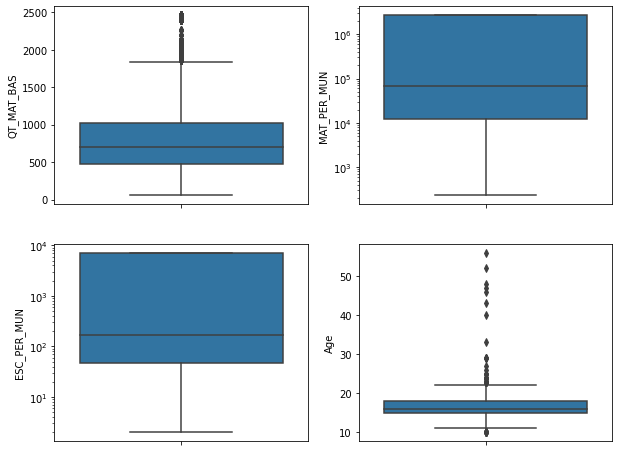

In [21]:
f, axes = plt.subplots(2, 2, figsize = (10, 8))

sns.boxplot(y = 'QT_MAT_BAS', data = df, orient ='v', ax = axes[0][0])
sns.boxplot(y = 'MAT_PER_MUN', data = df, orient ='v', ax = axes[0][1]).set(yscale = "log")
sns.boxplot(y = 'ESC_PER_MUN', data = df, orient ='v', ax = axes[1][0]).set(yscale = "log")
sns.boxplot(y = 'Age', data = df, orient = 'v', ax = axes[1][1])

plt.show()

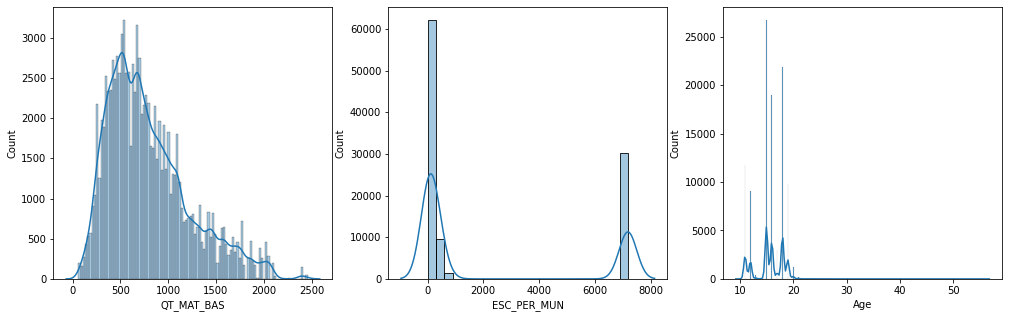

In [36]:
f, axes = plt.subplots(1, 3, figsize = (17, 5))
 
sns.histplot(df.QT_MAT_BAS, alpha = 0.4, kde = True, kde_kws = {"cut": 3}, ax = axes[0])
sns.histplot(df.ESC_PER_MUN, alpha = 0.4, kde = True, kde_kws = {"cut": 3}, ax = axes[1])
sns.histplot(df.Age, alpha = 0.7, kde = True, kde_kws = {"cut": 3}, ax = axes[2])

plt.show()

In [23]:
def plot_corr(df, size = 10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

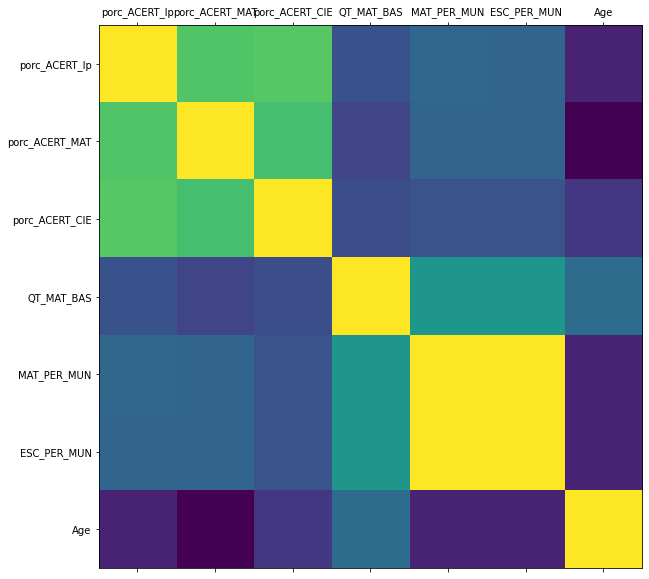

In [24]:
plot_corr(df_num)

In [25]:
df_num.corr()

,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,QT_MAT_BAS,MAT_PER_MUN,ESC_PER_MUN,Age
porc_ACERT_lp,1.000000,0.632669,0.647091,-0.017605,0.084713,0.084469,-0.231271
porc_ACERT_MAT,0.632669,1.000000,0.596637,-0.080114,0.081649,0.081445,-0.362521
porc_ACERT_CIE,0.647091,0.596637,1.000000,-0.034823,-0.013787,-0.013729,-0.139544
QT_MAT_BAS,-0.017605,-0.080114,-0.034823,1.000000,0.352475,0.350742,0.117633
MAT_PER_MUN,0.084713,0.081649,-0.013787,0.352475,1.000000,0.999946,-0.228246
ESC_PER_MUN,0.084469,0.081445,-0.013729,0.350742,0.999946,1.000000,-0.227692
Age,-0.231271,-0.362521,-0.139544,0.117633,-0.228246,-0.227692,1.000000


In [26]:
# OHE
categ_ohe_quests = ['Q9', 'Q22', 'Q24', 'Q34', 'Q59', 'Q61', 'Q62', 'Q63',
                    'RegiaoMetropolitana', 'SERIE_ANO', 'TP_SEXO', 'PERIODO',
                    'Tipo_PROVA', 'disability']

# Ordinals:

## A < B < C < ... 
enc_greater = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q19', 
               'Q20', 'Q21', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 
               'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 
               'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 
               'Q57', 'Q58', 'Q60']

## A > B > C > ... 
enc_lower = ['Q1', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16','Q17', 'Q18', 'Q23', 'Q25', 'Q26', 'Q33']

## Categ: A, D, B, C
categ_ADBC = ['Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49']

## Particular cases
#'Q32'
#'Q42' 

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(
    df,
    df[['porc_ACERT_MAT', 'porc_ACERT_CIE', 'porc_ACERT_lp',
        'nivel_profic_lp','nivel_profic_mat','nivel_profic_cie']], 
    test_size = 0.2, random_state = 181980)

In [29]:
# Cria um pipeline para tratar as variaveis de interesse
df_transform = ColumnTransformer(
    [('cat_encod', OneHotEncoder(drop = 'first'), categ_ohe_quests),
    ('Ordinal_lower', OrdinalEncoder(categories = [['A', 'B', 'C', 'D', 'E']] * len(enc_lower)), enc_lower),
    ('Ordinal_greater', OrdinalEncoder(categories = [['E', 'D', 'C', 'B', 'A']] * len(enc_greater)), enc_greater),
    ('Ordinal_ADBC', OrdinalEncoder(categories = [['A', 'D', 'B', 'C']] * len(categ_ADBC)), categ_ADBC),
    ('Ordinal_particular1', OrdinalEncoder(categories = [['D', 'A', 'B', 'C']]), ['Q32']),
    ('Ordinal_particular2', OrdinalEncoder(categories = [['D', 'C', 'E', 'B', 'A']]), ['Q42']),
    ('scale_robust', RobustScaler(), ['Age','QT_MAT_BAS']),
    ('scale_max', MaxAbsScaler(), ['ESC_PER_MUN'] )],
    remainder = 'drop'
)

#Ajusta o pipeline e transforma no banco de "treino"
x_prepared = df_transform.fit_transform(df)
x_train_prepared = df_transform.fit_transform(x_train)
x_valid_prepared = df_transform.transform(x_valid)

In [51]:
class Implemented_Regression():
    
    '''
    required packages: numpy, random. 
    '''

    def __init__(self):
        self.train = False

    def fit_normal_equation(self, X, y):
        '''
        inputs: X and y must be a np.array.
        return: linear regression parameters by Normal Equation.
        '''
        X = np.insert(X, 0, 1, 1)
        
        self.train = True
        self.thetas = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
        
        return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
        

    def fit_gradient(self, X, y, alpha = 0.01, iterations = 10**4, threshold = 10**(-6)):
        
        '''
        inputs: X and y must be a np.array.
        return: linear regression parameters by Gradient Descent.
        '''
        
        X = np.insert(X, 0, 1, 1)
                
        self.thetas = np.array([np.random.normal() for i in range(X.shape[1])])
        n = len(y)
         
        for k in range(iterations):
            gradients = list()
            cost_func = 1/(2*n) * np.sum((np.dot(X, self.thetas) - y)**2)

            for j in range(len(self.thetas)):
                gradients.append(1/n * np.sum((np.dot(X, self.thetas) - y) * X[:, j]))

            aux_thetas = np.array([b - alpha*g for b, g in zip(self.thetas, gradients)])
            new_cost_func = 1/(2*n) * np.sum((np.dot(X, aux_thetas) - y)**2) 
            self.thetas = aux_thetas
            
            diff_gain = new_cost_func - cost_func
            
            if k >= 5 and abs(diff_gain) <= threshold:
                self.train = True
                return self.thetas
        
        self.train = True
        return self.thetas
     
        
    def predict(self, X_test):
        '''
        inputs: X must be a np.array.
        return: y predicted values by the fitted model.
        '''

        if self.train:
            X_test = np.insert(X_test, 0, 1, 1)
            return np.dot(X_test, self.thetas)
        else:
            raise ValueError("You first must fit a linear regression model.")
 

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.

from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot

reg_model = LinearRegression()
reg_model_mat = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
reg_model_cie = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
reg_model_lp = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])

mat_train_predict = reg_model_mat.predict(np.nan_to_num(x_train_prepared))
mat_valid_predict = reg_model_mat.predict(np.nan_to_num(x_valid_prepared))
sci_train_predict = reg_model_cie.predict(np.nan_to_num(x_train_prepared))
sci_valid_predict = reg_model_cie.predict(np.nan_to_num(x_valid_prepared))
lp_train_predict = reg_model_lp.predict(np.nan_to_num(x_train_prepared))
lp_valid_predict = reg_model_lp.predict(np.nan_to_num(x_valid_prepared))

MSE = {"ANSWER" : ['MAT train', 'MAT valid', 'SCI train', 'SCI valid', 'PT train', 'PT valid'],
       "MSE" : [mean_squared_error(y_train['porc_ACERT_MAT'], mat_train_predict),
                mean_squared_error(y_valid['porc_ACERT_MAT'], mat_valid_predict),
                mean_squared_error(y_train['porc_ACERT_CIE'], sci_train_predict),
                mean_squared_error(y_valid['porc_ACERT_CIE'], sci_valid_predict),
                mean_squared_error(y_train['porc_ACERT_lp'], lp_train_predict),
                mean_squared_error(y_valid['porc_ACERT_lp'], lp_valid_predict)]}

MSE = pd.DataFrame(MSE)
MSE

In [ ]:
#Residuals from Math answer model

visualizer = ResidualsPlot(reg_model, hist = False, qqplot = True)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_MAT'])
visualizer.show()

In [ ]:
#Residuals from Math answer model

reg_model_cie = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])

visualizer = ResidualsPlot(reg_model, hist = False, qqplot = True)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_CIE'])
visualizer.show()

In [ ]:
reg_model_lp = reg_model.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])

visualizer = ResidualsPlot(reg_model, hist = False, qqplot = True)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_lp'])
visualizer.show()


> What are the conclusions? (1-2 paragraphs)




2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [ ]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.

#Prediction error analysis from Math answers models
from sklearn.linear_model import SGDRegressor
from yellowbrick.regressor import PredictionError

sgd_reg_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)

visualizer = PredictionError(sgd_reg_model)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_MAT'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_MAT'])
visualizer.show()

In [ ]:
#Prediction error analysis from Sci answers models

sgd_reg_model2 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.01)
visualizer = PredictionError(sgd_reg_model2)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_CIE'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_CIE'])

visualizer.show()

In [ ]:
#Prediction erro analysis from Lp answers models

sgd_reg_model3 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.001)
visualizer = PredictionError(sgd_reg_model3)
visualizer.fit(np.nan_to_num(x_train_prepared), y_train['porc_ACERT_lp'])
visualizer.score(np.nan_to_num(x_valid_prepared), y_valid['porc_ACERT_lp'])

visualizer.show()

In [ ]:
#Comparison from error between learning rates

def cost_by_lr(X, y, learning_rate):
    
    X_train2, X_val,Y_train2, Y_val = train_test_split(X, y, test_size = 0.2, random_state = 181980)
    train_error, val_error = [], []
    
    for lr in learning_rate:
        model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = lr)
        model.fit(X_train2,Y_train2)
        
        y_train2_predict = model.predict(X_train2)
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(Y_train2,y_train2_predict))
        val_error.append(mean_squared_error(Y_val,y_val_predict))
        
        font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,
        }
        
    plt.plot(np.log(train_error),"g-", linewidth=1, label="Train")
    plt.plot(np.log(val_error),"r:", linewidth=2, label="Val")
    xi = list(range(len(learning_rate)))
    plt.xticks(xi, learning_rate)
    plt.title("Cost Function vs Learning Rate",fontdict= font)
    plt.xlabel("Learning Rate",fontdict= font)
    plt.ylabel("MSE (log scale)",fontdict=font)
    plt.legend()

In [ ]:
#For math answers
learning_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

cost_by_lr(np.nan_to_num(x_prepared), df['porc_ACERT_MAT'], learning_rate)

In [ ]:
#For Sci answers
learning_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

cost_by_lr(np.nan_to_num(x_prepared), df['porc_ACERT_CIE'], learning_rate)

In [ ]:
#For pt answers
learning_rate = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]

cost_by_lr(np.nan_to_num(x_prepared), df['porc_ACERT_lp'], learning_rate)


3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

#Comparison from error between Penalized polinomial regression with diferent alphas

def penalty_eval(X, y):
    
    X_train2, X_val,Y_train2, Y_val = train_test_split(X, y, test_size = 0.2, random_state = 181980)
    train_error_l2, val_error_l2, train_error_l1, val_error_l1 = [], [], [], []
    alphas = [1e-3, 1e-2, 1e-1]
    
    for al in alphas:
        
        model_l2 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', alpha = al, eta0 = 0.01)
        model_l1 = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', alpha = al, eta0 = 0.01)
        
        x_poly_prep = np.hstack((X_train2,X_train2**2))
        x_val_prep = np.hstack((X_val,X_val**2))
        
        model_l2.fit(x_poly_prep,Y_train2)
        model_l1.fit(x_poly_prep,Y_train2)
        
        y_train_l2_predict = model_l2.predict(x_poly_prep)
        y_val_l2_predict = model_l2.predict(x_val_prep)
        y_train_l1_predict = model_l1.predict(x_poly_prep)
        y_val_l1_predict = model_l1.predict(x_val_prep)
        
        train_error_l2.append(mean_squared_error(Y_train2,y_train_l2_predict))
        val_error_l2.append(mean_squared_error(Y_val,y_val_l2_predict))
        train_error_l1.append(mean_squared_error(Y_train2,y_train_l1_predict))
        val_error_l1.append(mean_squared_error(Y_val,y_val_l1_predict))
    
    font = {'family': 'serif', 'color':  'darkblue','weight': 'normal','size': 12,}
    plt.plot(np.log(train_error_l2),"g-", linewidth=1, label="Train - L2")
    plt.plot(np.log(val_error_l2),"r:", linewidth=2, label="Val- L2")
    plt.plot(np.log(train_error_l1),"b-", linewidth=1, label="Train- L1")
    plt.plot(np.log(val_error_l1),"m:", linewidth=2, label="Val- L1")
    
    xi = list(range(len(alphas)))
    
    plt.xticks(xi, alphas)
    plt.title("Cost Function - Penalized Polynomial Regression",fontdict= font)
    plt.xlabel("Alpha penalty",fontdict= font)
    plt.ylabel("MSE",fontdict=font)
    plt.legend()

In [ ]:
#For math answers

penalty_eval(np.nan_to_num(x_prepared), df['porc_ACERT_MAT'])

In [ ]:
#For sci answers

penalty_eval(np.nan_to_num(x_prepared), df['porc_ACERT_CIE'])

In [ ]:
#For pt answers
penaltys = ['l2', 'l1', 'elasticnet']

penalty_eval(np.nan_to_num(x_prepared), df['porc_ACERT_lp'])

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

def plot_cost_function(X, y, epochs, learning_rate):
    
    X_train2, X_val,Y_train2, Y_val = train_test_split(X, y, test_size = 0.2,random_state = 181980)
    train_error, val_error = [], []
    
    for epoch in range(1, epochs):
        
        model = SGDRegressor(max_iter = epoch, tol = 1e-3, penalty = None, eta0 = learning_rate)
        model.fit(X_train2, Y_train2)
        
        y_train2_predict = model.predict(X_train2)
        y_val_predict = model.predict(X_val)
        
        train_error.append(mean_squared_error(Y_train2, y_train2_predict))
        val_error.append(mean_squared_error(Y_val, y_val_predict))
        
        font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,}
        
    plt.plot(train_error, "g-", linewidth=1, label="Train")
    plt.plot(val_error, "r:", linewidth=2, label="Val")
    plt.title("Cost Function per Epoch size", fontdict= font)
    plt.xlabel("Number of Epochs", fontdict= font)
    plt.ylabel("MSE", fontdict=font)
    plt.legend()

In [ ]:
#For math answers

plot_cost_function(np.nan_to_num(x_prepared), df['porc_ACERT_MAT'], 100, 0.01)

In [ ]:
#For sci answers

plot_cost_function(np.nan_to_num(x_prepared), df['porc_ACERT_CIE'], 100, 0.01)

In [ ]:
#For pt answers

plot_cost_function(np.nan_to_num(x_prepared), df['porc_ACERT_lp'], 100, 0.01)

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

**Solution:** As previously done, the dataset was divided, randomly, in 2 sets: training and validation. We can see below that the target classes, for each of the knowledge areas, are unbalanced even in the complete dataset and after the division of it.

In [207]:
display(df['nivel_profic_lp'].value_counts(normalize = True), 
        x_train['nivel_profic_lp'].value_counts(normalize = True), 
        x_valid['nivel_profic_lp'].value_counts(normalize = True))

Básico              0.449376
Adequado            0.267941
Abaixo do Básico    0.223404
Avançado            0.059280
Name: nivel_profic_lp, dtype: float64

Básico              0.449132
Adequado            0.269467
Abaixo do Básico    0.222458
Avançado            0.058943
Name: nivel_profic_lp, dtype: float64

Básico              0.450351
Adequado            0.261837
Abaixo do Básico    0.227187
Avançado            0.060625
Name: nivel_profic_lp, dtype: float64

In [125]:
display(x_train['nivel_profic_mat'].value_counts(normalize = True), 
        x_valid['nivel_profic_mat'].value_counts(normalize = True))

Básico              0.448235
Abaixo do Básico    0.366454
Adequado            0.147182
Avançado            0.038128
Name: nivel_profic_mat, dtype: float64

Básico              0.447589
Abaixo do Básico    0.363315
Adequado            0.150279
Avançado            0.038818
Name: nivel_profic_mat, dtype: float64

In [122]:
display(x_train['nivel_profic_cie'].value_counts(normalize = True), 
        x_valid['nivel_profic_cie'].value_counts(normalize = True))

Básico              0.441778
Abaixo do Básico    0.289337
Adequado            0.210911
Avançado            0.057974
Name: nivel_profic_cie, dtype: float64

Básico              0.432130
Abaixo do Básico    0.295033
Adequado            0.213763
Avançado            0.059074
Name: nivel_profic_cie, dtype: float64

In [120]:
x_valid['nivel_profic_cie'].value_counts(normalize = True)

Básico              0.432130
Abaixo do Básico    0.295033
Adequado            0.213763
Avançado            0.059074
Name: nivel_profic_cie, dtype: float64

Almost the same percentage distributions of each of the targets can be observed:

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [143]:
targets = LabelEncoder()

train_target_lp = targets.fit_transform(x_train['nivel_profic_lp'])
train_target_mat = targets.fit_transform(x_train['nivel_profic_mat'])
train_target_cie = targets.fit_transform(x_train['nivel_profic_cie'])

valid_target_lp = targets.transform(x_valid['nivel_profic_lp'])
valid_target_mat = targets.transform(x_valid['nivel_profic_mat'])
valid_target_cie = targets.transform(x_valid['nivel_profic_cie'])

In [144]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.

w_lp = {0: 22,
        1: 27,
        2: 6,
        3: 45}

w_mat = {0: 36,
         1: 15,
         2: 4,
         3: 45}

w_cie = {0: 29,
         1: 21,
         2: 6,
         3: 44}

logistic_model_lp = LogisticRegression(multi_class = 'multinomial', class_weight = w_lp)
logistic_model_mat = LogisticRegression(multi_class = 'multinomial', class_weight = w_mat)
logistic_model_cie = LogisticRegression(multi_class = 'multinomial', class_weight = w_cie)

In [145]:
baseline_fit_lp = logistic_model_lp.fit(x_train_prepared, train_target_lp)
baseline_fit_mat = logistic_model_mat.fit(x_train_prepared, train_target_mat)
baseline_fit_cie = logistic_model_cie.fit(x_train_prepared, train_target_cie)

> What are the conclusions? (1-2 paragraphs)


2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

The function below computes the cost function for each epoch, in a given range, in the training/validation. For logistic regression, the cost function is given by log-loss. As can be seen, after 10 epochs does not show considerable gains 

In [202]:
# TODO: Plot the cost function vs. number of iterations in the training set.

from sklearn.metrics import log_loss

def costFunction_by_logloss(x_train, y_train, x_val, y_val, epochs, subject):
    
    train_error = []
    val_error = []
    
    if subject == 'lp':
            
        w = {0: 22,
             1: 27,
             2: 6,
             3: 45}
            
        for epoch in range(1, epochs):
            
            lr = LogisticRegression(multi_class = 'multinomial', class_weight = w, max_iter = epoch, tol=1e-3)

            lr.fit(x_train, y_train)
            y_train_pred = lr.predict_proba(x_train)
            y_val_pred = lr.predict_proba(x_val)

            train_error.append(log_loss(y_train, y_train_pred))
            val_error.append(log_loss(y_val, y_val_pred))
            
            
    elif subject == 'mat':
            
        w = {0: 36,
             1: 15,
             2: 4,
             3: 45}
        
        for epoch in range(1, epochs):
            
            lr = LogisticRegression(multi_class = 'multinomial', class_weight = w, max_iter = epoch, tol=1e-3)
            lr.fit(x_train, y_train)
            y_train_pred = lr.predict_proba(x_train)
            y_val_pred = lr.predict_proba(x_val)

            train_error.append(log_loss(y_train, y_train_pred))
            val_error.append(log_loss(y_val, y_val_pred))
        
        
    elif subject == 'cie':
            
        w = {0: 29,
             1: 21,
             2: 6,
             3: 44}
        
        for epoch in range(1, epochs):
        
            lr = LogisticRegression(multi_class = 'multinomial', class_weight = w, max_iter = epoch, tol=1e-3)
            lr.fit(x_train, y_train)
            y_train_pred = lr.predict_proba(x_train)
            y_val_pred = lr.predict_proba(x_val)

            train_error.append(log_loss(y_train, y_train_pred))
            val_error.append(log_loss(y_val, y_val_pred))
    
    
#    fig, ax = plt.subplots(figsize = (12, 8))
#    ax.plot(train_error, 'r', label = 'train')
#    ax.plot(val_error, 'b',  label = 'valid')
#    ax.set_xlabel('Epoch')
#    ax.set_ylabel('Log-Loss')
#    ax.legend(loc = 'best')
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 12,}
    
    plt.plot(train_error, "g-", linewidth=1, label = "Train")
    plt.plot(val_error, "r:", linewidth=2, label = "Val")
    plt.title("Cost Function (Log_loss) vs Epoch", fontdict = font)
    plt.xlabel("Epoch", fontdict = font)
    plt.ylabel("Log_loss",fontdict = font)
    plt.legend()

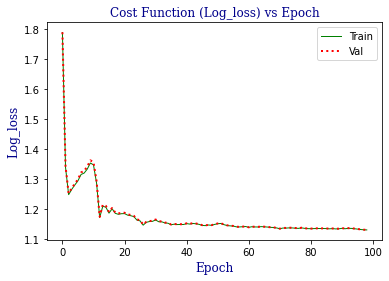

In [203]:
costFunction_by_logloss(x_train_prepared, train_target_lp, x_valid_prepared, valid_target_lp, 100, 'lp')

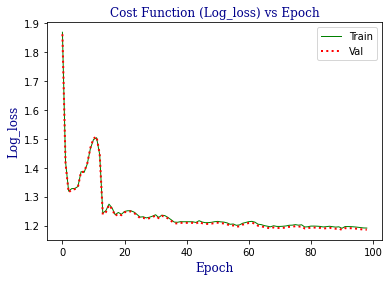

In [204]:
costFunction_by_logloss(x_train_prepared, train_target_lp, x_valid_prepared, valid_target_lp, 100, 'mat')

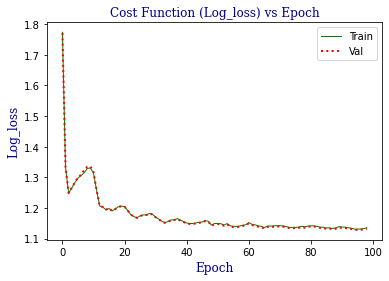

In [205]:
costFunction_by_logloss(x_train_prepared, train_target_lp, x_valid_prepared, valid_target_lp, 100, 'cie')

> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)


## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**